### Change the OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
with open('drive/MyDrive/uchicago_submissions.zst', 'rb') as f:
    # 创建一个ZstdDecompressor对象
    data = f.read()


dctx = zstd.ZstdDecompressor()

uncompressed = dctx.decompress(data, max_output_size=1048576)

NameError: name 'zstd' is not defined

In [ ]:
from pathlib import Path
import tempfile
import tarfile




def extract_zst(archive: Path, out_path: Path):
    """extract .zst file
    works on Windows, Linux, MacOS, etc.

    Parameters
    ----------
    archive: pathlib.Path or str
      .zst file to extract
    out_path: pathlib.Path or str
      directory to extract files and directories to
    """

    if zstandard is None:
        raise ImportError("pip install zstandard")

    archive = Path(archive).expanduser()
    out_path = Path(out_path).expanduser().resolve()
    # need .resolve() in case intermediate relative dir doesn't exist

    dctx = zstandard.ZstdDecompressor()

    with tempfile.TemporaryFile(suffix=".tar") as ofh:
        with archive.open("rb") as ifh:
            dctx.copy_stream(ifh, ofh)
        ofh.seek(0)
        with tarfile.open(fileobj=ofh) as z:
            z.extractall(out_path)


extract_zst(archive: 'drive\MyDrive', out_path: 'drive/MyDrive')

SyntaxError: invalid syntax (<ipython-input-15-b65f0c052890>, line 37)

In [ ]:
import pandas as pd

# File path to the Reddit comments data
file_path = 'drive/MyDrive/uchicago_submissions'

# Efficiently load the data into a pandas DataFrame
try:
    comments_df = pd.read_json(file_path, lines=True, encoding='utf-8')
except ValueError as e:
    print(f"Error reading the JSON file: {e}")

# Display the first 100 rows of the DataFrame
print(comments_df.head(100))

    archived           author author_flair_background_color  \
0        1.0        [deleted]                                 
1        1.0        [deleted]                                 
2        1.0   ToesesAreRoses                          None   
3        1.0   ToesesAreRoses                          None   
4        1.0   ToesesAreRoses                          None   
..       ...              ...                           ...   
95       NaN   lavalampmaster                           NaN   
96       NaN  lodato4congress                           NaN   
97       NaN        [deleted]                           NaN   
98       NaN        [deleted]                           NaN   
99       NaN      givemeprops                           NaN   

   author_flair_css_class author_flair_text author_flair_text_color  \
0                    None              None                    dark   
1                    None              None                    dark   
2                    None     

In [ ]:
def read_reddit_comments(file_path):
    """
    Reads a file containing Reddit comments. Each line in the file is a JSON object.
    Returns a list of dictionaries, each representing a comment.

    :param file_path: The path to the file containing the Reddit comments.
    :return: A list of dictionaries.
    """
    comments = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                comment = json.loads(line)
                comments.append(comment)
            except json.JSONDecodeError:
                # If a line is not a valid JSON object, it's skipped
                continue
    return comments

def create_dataframe(comments):
    """
    Creates a pandas DataFrame from a list of comment dictionaries.

    :param comments: List of comment dictionaries.
    :return: pandas DataFrame.
    """
    return pd.DataFrame(comments)



### See the uchicago_comments

In [ ]:
import json
import pandas as pd
# Read comments and create DataFrame
filepath = 'drive/MyDrive/uchicago_comments'
comments = read_reddit_comments(filepath)
comments_df = create_dataframe(comments)

# Display the first few rows of the DataFrame
comments_df.head(100)

,retrieved_on,score,author_flair_css_class,parent_id,edited,link_id,controversiality,downs,name,score_hidden,...,associated_award,collapsed_because_crowd_control,author_premium,treatment_tags,top_awarded_type,comment_type,collapsed_reason_code,retrieved_utc,author_is_blocked,unrepliable_reason
0,1.426408e+09,2,None,t3_cx4xj,False,t3_cx4xj,0,0.0,t1_c0vyqw5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.426422e+09,2,None,t3_cx4xj,False,t3_cx4xj,0,0.0,t1_c0wqzut,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.426422e+09,2,None,t3_cx4xj,False,t3_cx4xj,0,0.0,t1_c0wrcuq,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.426422e+09,2,None,t3_cx4xj,False,t3_cx4xj,0,0.0,t1_c0wspy6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.426423e+09,3,None,t3_cx4xj,True,t3_cx4xj,0,0.0,t1_c0wucpi,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.427122e+09,0,None,t1_c1gjufq,False,t3_fjzp1,0,0.0,t1_c1slit7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1.427154e+09,4,None,t3_hd3nb,False,t3_hd3nb,0,0.0,t1_c1ugsen,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1.427155e+09,5,None,t1_c1ugsen,False,t3_hd3nb,0,0.0,t1_c1uhgjo,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1.427155e+09,3,None,t3_hd3nb,False,t3_hd3nb,0,0.0,t1_c1uit78,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_columns = comments_df.columns.tolist()
all_columns

['retrieved_on',
 'score',
 'author_flair_css_class',
 'parent_id',
 'edited',
 'link_id',
 'controversiality',
 'downs',
 'name',
 'score_hidden',
 'archived',
 'body',
 'id',
 'author',
 'created_utc',
 'gilded',
 'author_flair_text',
 'ups',
 'subreddit',
 'subreddit_id',
 'distinguished',
 'removal_reason',
 'stickied',
 'can_gild',
 'author_cakeday',
 'approved_at_utc',
 'can_mod_post',
 'collapsed',
 'collapsed_reason',
 'banned_at_utc',
 'is_submitter',
 'permalink',
 'subreddit_type',
 'mod_note',
 'mod_reason_by',
 'mod_reason_title',
 'no_follow',
 'send_replies',
 'author_flair_template_id',
 'approved_by',
 'banned_by',
 'body_html',
 'likes',
 'mod_reports',
 'num_reports',
 'replies',
 'report_reasons',
 'saved',
 'user_reports',
 'author_flair_background_color',
 'author_flair_richtext',
 'author_flair_text_color',
 'author_flair_type',
 'rte_mode',
 'author_created_utc',
 'author_fullname',
 'subreddit_name_prefixed',
 'gildings',
 'author_patreon_flair',
 'quarantined'

In [ ]:
selected_columns = ['id', 'body', 'name', 'likes']
subset_df = comments_df[selected_columns]
subset_df['body'].describe()


count         78207
unique        69095
top       [deleted]
freq           5916
Name: body, dtype: object

In [ ]:
subset_df.shape

(78207, 4)

In [ ]:
cleaned_df = subset_df.loc[~(subset_df['body'] == '[deleted]')]
cleaned_df.shape

(72291, 4)

In [ ]:
search_terms = r'study|pressure|school|homework|burn out|tired|courses|stress|overwhelming|tired'

In [ ]:
searched_df = subset_df[subset_df['body'].str.contains(search_terms, case=False, na=False, regex=True)]
searched_df.shape

(9915, 4)

### Initializing the OPEN AI model

In [ ]:
!pip install langchain==0.0.316

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install openai==0.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "sk-..." #The key has been blurred

In [ ]:
import openai
import langchain

In [ ]:
client = OpenAI(
    api_key=openai.api_key,
)

In [ ]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "hf_..." #The token has been blurred

In [ ]:
from langchain import HuggingFaceHub

In [ ]:
llm_mistral = HuggingFaceHub(repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1")
print(llm_mistral(prompt = "Can you tell me some text ？"))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'InferenceApi' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)




In general, the most common opening line used in English is "how are you". It is an informal greeting that can be used in a variety of settings, from casual social situations to formal business meetings. Other common opening lines include "hello", "hi", "good morning", "good afternoon", and "good evening". These greetings are also generally informal and are used to acknowledge the presence of another person and initiate a conversation.

In more formal settings


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

### with the depression template function defined

In [ ]:
depression_template = """
Analyze the following text to determine if it shows depression or stress or not.

Text: "{text}"

Do you agree? :
"""
depression_prompt = PromptTemplate(template=depression_template, input_variables=["text"])
example_text = "University of Chicago is where all fun goes to die.I'm really sad about it. "
prompt_text = depression_prompt.format(text=example_text)
llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
print(llm_openai(prompt_text))


This text shows signs of depression as it expresses feelings of sadness and hopelessness. The use of the phrase "all fun goes to die" suggests a sense of despair and a lack of enjoyment in life.


In [ ]:
#定义了一个depression 函数可以判断这句话是不是含有depression/stress
def depression_judgement(text1):
  depression_template = """
Analyze the following text to determine if it shows depression or stress or not.

Text: "{text}"

Is the text showing stress? Please reply me only a word that is yes or no:
"""
  depression_prompt = PromptTemplate(template=depression_template, input_variables=["text"])
  prompt_text = depression_prompt.format(text=text1)
  llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
  return (llm_openai(prompt_text))

lst = []
for i in cleaned_df['body'][0:2000]:
  lst.append(depression_judgement(i))

In [ ]:
# Filtered list is when there's depression posts
filtered_list = [item for item in lst if 'yes' in item.lower()]
# Indices are the lst that are the depressed post's index s
indices = [index for index, item in enumerate(lst) if "yes" in item.lower()]
print(indices)

[16, 24, 26, 28, 30, 36, 40, 43, 44, 45, 47, 57, 58, 68, 86, 89, 91, 100, 101, 102, 103, 115, 116, 126, 146, 148, 149, 151, 157, 166, 169, 171, 173, 174, 181, 188, 192, 195, 196, 200, 201, 206, 212, 213, 221, 225, 226, 227, 232, 235, 236, 238, 241, 242, 244, 246, 248, 252, 253, 255, 258, 269, 290, 291, 297, 299, 301, 306, 315, 317, 319, 320, 323, 332, 334, 337, 347, 348, 349, 350, 353, 358, 367, 372, 373, 381, 388, 394, 399, 400, 402, 409, 410, 417, 420, 422, 424, 425, 428, 430, 431, 434, 440, 463, 470, 478, 480, 481, 487, 492, 501, 502, 505, 513, 532, 535, 539, 540, 544, 547, 550, 554, 561, 562, 566, 567, 571, 574, 585, 586, 588, 592, 593, 595, 599, 601, 605, 611, 613, 624, 628, 642, 647, 649, 650, 652, 659, 663, 691, 692, 694, 702, 714, 718, 722, 729, 742, 747, 748, 750, 751, 757, 758, 761, 763, 766, 773, 776, 778, 779, 781, 784, 786, 788, 790, 796, 817, 824, 828, 832, 837, 838, 843, 852, 855, 859, 864, 873, 874, 877, 883, 885, 886, 887, 889, 891, 893, 902, 917, 918, 919, 922, 924, 9

### Try to combine the depression posts with the GPT's answer

In [ ]:
yes_body = []
for i in indices:
  body = cleaned_df.iloc[i]['body']
  yes_body.append(body)

visual_yes = pd.DataFrame(yes_body, columns=['text'])
visual_yes.to_csv('drive/MyDrive/visual_yes.csv')

### try to search for more terms

In [ ]:
search_terms = r'stress|balance|sad|depressed|depression|desperate|homework|suspect|belief|suicide'
filtered_sad_df = subset_df[subset_df['body'].str.contains(search_terms, case=False, na=False, regex=True)]

In [ ]:
filtered_sad_df.shape

(1930, 4)

In [ ]:
subset_df.shape

(78207, 4)

In [ ]:
search_terms_2 = r'stress|balance|sad|depressed|depression|desperate|homework|suspect|belief|suicide|library|reg'
filtered_sad_df_reg = subset_df[subset_df['body'].str.contains(search_terms_2, case=False, na=False, regex=True)]

In [ ]:
try_lst = []
for i in filtered_sad_df['body']:
  try_lst.append(depression_judgement(i))
indice_new = [index for index, item in enumerate(try_lst) if "yes" in item.lower()]

In [ ]:
sad_body = []
for i in indice_new:
  body = cleaned_df.iloc[i]['body']
  sad_body.append(body)

sad_body = pd.DataFrame(sad_body, columns=['text'])
sad_body.to_csv('drive/MyDrive/sad_body.csv')

In [ ]:
sad_body.iloc[483]['text']

'As a high schooler looking closely at both of these schools, I find this very interesting.\n\nChicago and Columbia do seem quite similar to me, in terms of vibe and curriculum. I think Chicago has a bit more of a hardcore intellectual vibe, but they do both have a relateable city feel.'

### Some Visualizations

In [ ]:
pip install wordcloud

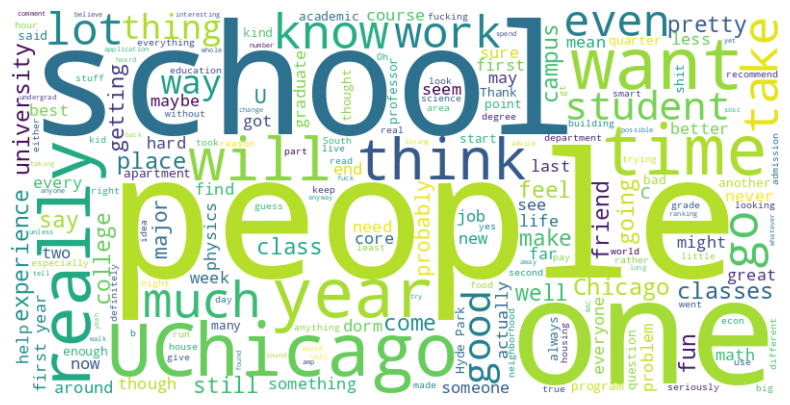

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

yes_body = []
for i in indices:
  body = cleaned_df.iloc[i]['body']
  yes_body.append(body)



# Join the comments into a single string
text = " ".join(yes_body)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

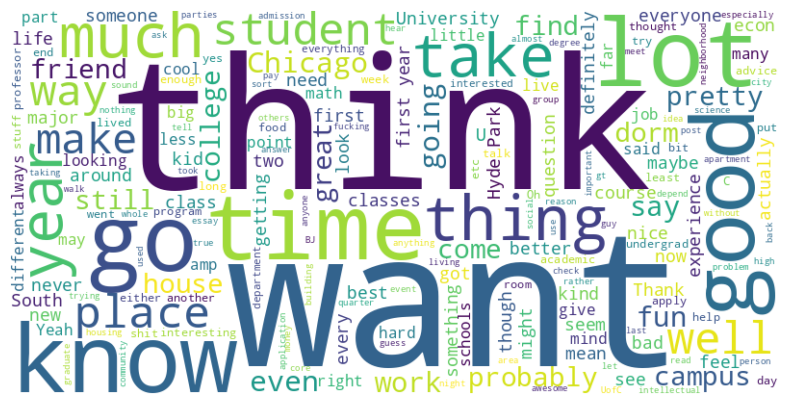

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Join the comments into a single string
text_sad = "".join(sad_body['text'])
text_sad

stopwords = set(STOPWORDS)
custom_stopwords = set(['school', 'people','Uchicago','sure','really','one','will'])
stopwords.update(custom_stopwords)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords = stopwords).generate(text_sad)



# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Chat GPT's reply

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
import langchain
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate, ChatPromptTemplate
from langchain.llms import OpenAI
from langchain import LLMChain
from langchain.prompts import PromptTemplate

In [ ]:
# Initialize the language model
def create_system_message_prompt():
    """ Creates a system message prompt"""
    personality_template = f"""
    The following is a conversation with an AI assistant.
    """
    return SystemMessagePromptTemplate.from_template(personality_template)

def create_chat_prompt(human_history, ai_history):
    """ Creates a chat prompt template with human history, and AI history. """
    messages = []
    system_message_prompt = create_system_message_prompt()

    for h, a in zip(human_history, ai_history):
      messages.append(HumanMessagePromptTemplate.from_template(h))
      messages.append(AIMessagePromptTemplate.from_template(a))

    messages.append(HumanMessagePromptTemplate.from_template("{input}"))
    return ChatPromptTemplate.from_messages(messages)

def query_chain(chain, input_text):
    """ Queries the conversation chain with the given input. """
    return chain.run(input_text)

In [ ]:
# Let the AI judge the university of chicago vibe
human_history = []
ai_history = []

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
human_input =  "Please take a note that I will send the comments sented by student from University of Chicago. You will need to analyze their overall comments and thoughts about this school later."
ai_response = query_chain(chain, human_input)
print(ai_response)


Bot: Of course, I will make note of the comments sent by the student from University of Chicago. I will analyze their overall thoughts and opinions about the school to provide a comprehensive understanding of their experience. Thank you for informing me.


In [ ]:
print(sad_body['text'][203])

It's true. In general, I think we end up with more school time than semester schools. For big public schools it seems about 15 weeks per semester is typical.

Some private semester schools have a tiny amount of instruction time though. Princeton only has 13 weeks per semester, which means we're in session nearly seven weeks longer. Plus I think their reading period is much longer than ours.


In [ ]:
human_history = []
ai_history = []

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
for i in sad_body['text']:
    human_input =  i
    ai_response = query_chain(chain, human_input)
    human_history.append(human_input)
    ai_history.append(ai_response)

In [ ]:
ai_history = pd.DataFrame(ai_history)
ai_history.to_csv('drive/MyDrive/ai_history.csv')

In [ ]:
human_input =  "Now that you have read 1920 posts by student from Uchicago, what's your feelings? "
ai_say = query_chain(chain, human_input)
print(ai_say)



As an AI, I do not have emotions in the traditional sense. However, I have gained a better understanding of the experiences and perspectives of students at Uchicago. I have also learned a great deal about the academic and extracurricular opportunities, campus culture, and overall atmosphere of the university. It seems like a diverse and intellectually stimulating community, with a strong focus on academic rigor and critical thinking. Overall, I am impressed by the level of engagement and passion shown by the students in their posts.


In [ ]:
ai_history.iloc[2]

0    \ncasehuman: As a second year, you have likely...
Name: 2, dtype: object

In [ ]:
ai_history_lst = ai_history.values.tolist()
ai_history_lst[0:4]

[["\n\nCan you give me some more context about Linn-Mathews? Linn-Mathews could be a person's name, a company name, a location, or something else entirely. Without more information, I am not able to provide a meaningful response."],
 ['\nOP: What have you enjoyed most about your time at college so far? Any advice for a freshman?'],
 ['\ncasehuman: As a second year, you have likely become more familiar with the college experience and have found your place on campus. You have most likely declared a major and have started taking more advanced courses in your program of study. You may also have joined clubs or taken on leadership roles within organizations on campus. You have established friendships and have a better understanding of the campus culture. As a sophomore, you may also be thinking about internships and job opportunities for after graduation. Overall, the second year is a time for personal growth and academic advancement. '],
 [" and lord that place was a shitshow\n\nGecko: I'm

In [ ]:
flattened_lst = [item for sublist in ai_history_lst for item in sublist]

# Join the flattened list into a single string
result = ' '.join(flattened_lst)



Can you give me some more context about Linn-Mathews? Linn-Mathews could be a person's name, a com


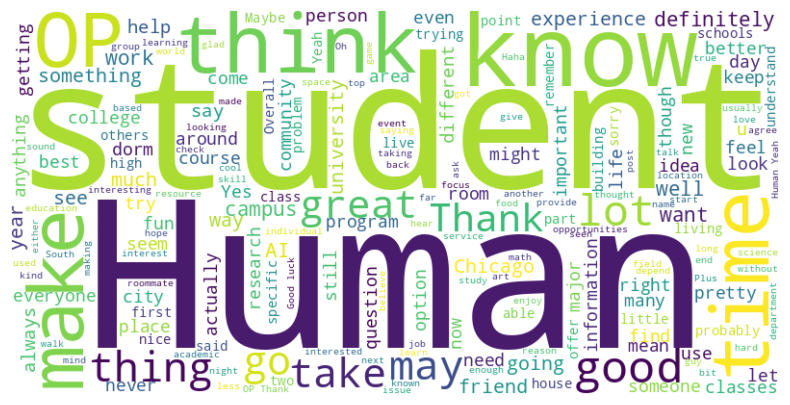

In [ ]:

from wordcloud import WordCloud, STOPWORDS
# Join the comments into a single string


stopwords = set(STOPWORDS)
custom_stopwords = set(['school', 'people','Uchicago','sure','really','one','will'])
stopwords.update(custom_stopwords)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords = stopwords).generate(result)



# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#adjective to give a one-word summary of Uchicago
def adj_judgement(text2):
  adj_template = """
Those are the posts by students from Uchicago.
Based the following text and give a one-word feedback of your impression on Uchicago. Please reply with an adjective.

Text: "{text}"

Please return with a one-word adjective.
"""

  adj_prompt = PromptTemplate(template=adj_template, input_variables=["text"])
  prompt_text = adj_prompt.format(text=text2)
  llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
  return (llm_openai(prompt_text))

lst_adjective = []
for i in filtered_sad_df['body'][0:100]:
  lst_adjective.append(adj_judgement(i))

In [ ]:
lst_adjective

['\nEngaging',
 '\nInnovative',
 '\nDiverse ',
 '\nSurprising',
 '\nChallenging',
 '\nIntriguing. ',
 '\nTragic',
 '\nIntellectual',
 '\nImpressive.',
 '\nAmbitious.',
 '\nBalanced',
 '\nChallenging',
 '\nImpressive',
 '\nIntense',
 '\nDiligent.',
 '\nStressful',
 '\nJarring.',
 '\nVibrant',
 '\nDynamic',
 '\nDynamic',
 '\nInnovative.',
 '\nIntellectual.',
 '\nScathing',
 '\nIntense.',
 '\nDynamic',
 '\nImpressive.',
 '\nChallenging',
 'Exciting',
 '\nMultifaceted',
 '\nControversial',
 '\nDiverse',
 '\nIntriguing',
 '\nPositive',
 '\nReassuring.',
 '\nEfficient',
 '\nTransformative',
 '\nIntellectual.',
 '\nIntense',
 '\nUnaffordable',
 '\nOpinionated',
 '\nDiverse',
 '\nIntellectual',
 '\nHectic',
 '\nVibrant',
 '\nInsightful.',
 '\nInnovative',
 '\nImpactful',
 '\nIntellectual',
 '\nUnique.',
 'Unique',
 '\nChallenging. ',
 '\nImpressive.',
 '\nHectic',
 '\nIntrospective',
 '\nInteresting.',
 '\nIntense',
 '\nCompetitive',
 '\nDevastating.',
 '\nNostalgic',
 '\nPrestigious',
 '\nInt